In [3]:
import pandas as pd
import numpy as np

# Get data 
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

In [9]:
laptop_df = pd.read_csv('laptops.csv')

laptop_df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


# Preparing the dataset


In [10]:
laptop_df.columns = laptop_df.columns.str.lower().str.replace(' ', '_')

laptop_df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [11]:
str_columns = list(laptop_df.dtypes[laptop_df.dtypes == 'object'].index)

In [12]:
for col in str_columns:
    laptop_df[col] = laptop_df[col].str.lower().str.replace(' ', '_')

In [13]:
laptop_df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01


# EDA

In [15]:
for col in laptop_df.columns:
    print(col)
    print(laptop_df[col].unique()[:5])
    print(laptop_df[col].nunique())

    print()

laptop
['asus_expertbook_b1_b1502cba-ej0436x_intel_core_i5-1235u/8gb/512gb_ssd/15.6"'
 'alurin_go_start_intel_celeron_n4020/8gb/256gb_ssd/15.6"'
 'asus_expertbook_b1_b1502cba-ej0424x_intel_core_i3-1215u/8gb/256gb_ssd/15.6"'
 'msi_katana_gf66_12uc-082xes_intel_core_i7-12700h/16gb/1tb_ssd/rtx3050/15.6"'
 'hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb_ssd/15.6"']
2160

status
['new' 'refurbished']
2

brand
['asus' 'alurin' 'msi' 'hp' 'lenovo']
27

model
['expertbook' 'go' 'katana' '15s' 'crosshair']
121

cpu
['intel_core_i5' 'intel_celeron' 'intel_core_i3' 'intel_core_i7'
 'amd_ryzen_5']
28

ram
[ 8 16 32 12  4]
9

storage
[ 512  256 1000   64  128]
12

storage_type
['ssd' 'emmc' nan]
2

gpu
[nan 'rtx_3050' 'rtx_4060' 'rtx_4050' 'rtx_3060']
44

screen
[15.6 17.3 14.  16.1 13.3]
29

touch
['no' 'yes']
2

final_price
[1009.    299.    789.   1199.    669.01]
1440



In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='final_price', ylabel='Count'>

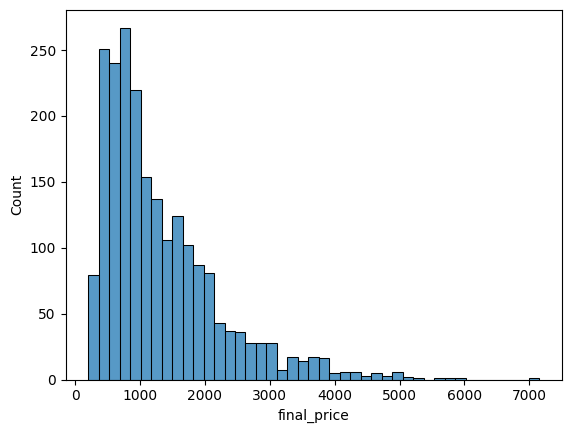

In [10]:
sns.histplot(laptop_df['final_price'])

In [16]:
price_logs = np.log1p(laptop_df['final_price'])

<Axes: xlabel='final_price', ylabel='Count'>

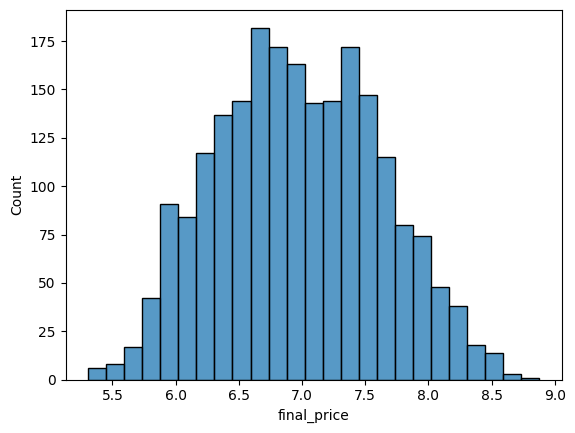

In [17]:
sns.histplot(price_logs)

# Question 1
There's one column with missing values. What is it?

In [18]:
laptop_df.isnull().sum()

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

# Question 2
What's the median (50% percentile) for variable 'ram'?

In [14]:
laptop_df['ram'].median()

np.float64(16.0)

# Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.<br>
Split your data in train/val/test sets, with 60%/20%/20% distribution.


In [15]:
n = len(laptop_df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [16]:
n,  n_test

(2160, 432)

In [17]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [18]:
df_train = laptop_df.iloc[idx[:n_train]]
df_val = laptop_df.iloc[idx[n_train:n_train+n_val]]
df_test = laptop_df.iloc[idx[n_train+n_val:]]

In [19]:
len(df_test), len(df_train), len(df_val)

(432, 1296, 432)

In [20]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)


In [22]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

# Question 3
<ul>
    <li>We need to deal with missing values for the column from Q1.</li>
    <li>We have two options: fill it with 0 or with the mean of this variable.</li>
    <li>Try both options. For each, train a linear regression model without regularization using the code from the lessons.</li>
    <li>For computing the mean, use the training only!</li>
    <li>Use the validation dataset to evaluate the models and compare the RMSE of each option.</li>
    <li>Round the RMSE scores to 2 decimal digits using round(score, 2)</li>
    <li>Which option gives better RMSE?</li>
</ul>

# Linear regression

In [23]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

# Baseline model

In [24]:
df_train.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
dtype: object

In [31]:
base = ['ram', 'storage', 'screen']


In [26]:
X_train.isnull().sum()

ram        0
storage    0
screen     3
dtype: int64

In [27]:
X_train_zeros = X_train.fillna(0).values

X_train_zeros

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [28]:
X_train_means = X_train.fillna(df_train.screen.mean()).values
X_train_means

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [29]:
w0, w = train_linear_regression(X_train_zeros, y_train)
w0, w

(np.float64(6.7271637061124565),
 array([ 0.02630589,  0.00066041, -0.03651909]))

In [30]:
y_pred = w0 + X_train_zeros.dot(w)

<Axes: ylabel='Count'>

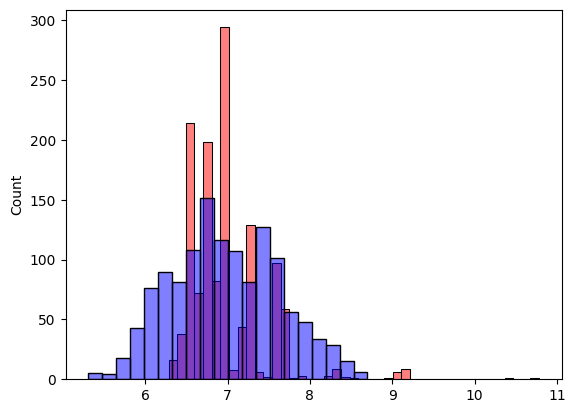

In [31]:
sns.histplot(y_pred, color='red', alpha=0.5)
sns.histplot(y_train, color='blue', alpha=0.5)

# RMSE

In [34]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [35]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [63]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

round(rmse(y_val, y_pred),2)

np.float64(0.43)

In [61]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(df.screen.mean())
    X = df_num.values
    return X

In [64]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

round(rmse(y_val, y_pred),2)

np.float64(0.43)

# categorical variables

In [47]:
df_train.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
dtype: object

In [53]:
df_train.model.value_counts()

model
vivobook    63
thinkpad    62
rog         62
15s         59
ideapad     57
            ..
ws63         1
14s          1
aurelion     1
v17          1
p1411        1
Name: count, Length: 113, dtype: int64

In [65]:
categories_variables = ['status', 'brand', 'cpu', 'storage_type', 'gpu', 'touch']

In [66]:
categories = {}

for c in categories_variables:
    categories[c] = list(df_train[c].value_counts().index)

In [67]:
categories

{'status': ['new', 'refurbished'],
 'brand': ['asus',
  'lenovo',
  'hp',
  'msi',
  'acer',
  'apple',
  'dell',
  'microsoft',
  'gigabyte',
  'razer',
  'lg',
  'alurin',
  'medion',
  'pccom',
  'samsung',
  'dynabook_toshiba',
  'vant',
  'deep_gaming',
  'primux',
  'prixton',
  'thomson',
  'innjoo',
  'millenium',
  'realme',
  'denver'],
 'cpu': ['intel_core_i7',
  'intel_core_i5',
  'amd_ryzen_7',
  'amd_ryzen_5',
  'intel_core_i3',
  'intel_core_i9',
  'intel_celeron',
  'intel_evo_core_i7',
  'amd_ryzen_9',
  'amd_ryzen_3',
  'intel_evo_core_i5',
  'apple_m2',
  'apple_m2_pro',
  'amd_3020e',
  'intel_pentium',
  'amd_athlon',
  'apple_m1',
  'apple_m1_pro',
  'intel_core_m3',
  'amd_3015e',
  'microsoft_sq1',
  'amd_radeon_9',
  'qualcomm_snapdragon_7',
  'mediatek_mt8183'],
 'storage_type': ['ssd', 'emmc'],
 'gpu': ['rtx_3050',
  'rtx_3060',
  'rtx_3070',
  'rtx_4060',
  'rtx_3080',
  'gtx_1650',
  'rtx_4070',
  'rtx_4050',
  'rtx_2070',
  'rtx_4090',
  'rtx_4080',
  'rtx

In [68]:
base

['ram', 'storage', 'screen']

In [72]:
def prepare_X(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    features = base.copy()

    for name, values in categories.items():
        for value in values:
            df[f'{name}_{value}'] = (df[name] == value).astype('int')
            features.append(f'{name}_{value}')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [73]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(1908781851727.8503)

In [74]:
w0, w

(np.float64(6896171784225268.0),
 array([-4.34784087e+00, -1.05086684e-02,  5.49527576e+01, -6.85840485e+15,
        -6.85840485e+15, -6.06723198e+13, -6.06723198e+13, -6.06723198e+13,
        -6.06723198e+13, -6.06723198e+13, -6.06723198e+13, -6.06723198e+13,
        -6.06723198e+13, -6.06723198e+13, -6.06723198e+13, -6.06723198e+13,
        -6.06723198e+13, -6.06723198e+13, -6.06723198e+13, -6.06723198e+13,
        -6.06723198e+13, -6.06723198e+13, -6.06723198e+13, -6.06723198e+13,
        -6.06723198e+13, -6.06723198e+13, -6.06723198e+13, -6.06723198e+13,
        -6.06723198e+13, -6.06723198e+13,  2.29053822e+13,  2.29053822e+13,
         2.29053822e+13,  2.29053822e+13,  2.29053822e+13,  2.29053822e+13,
         2.29053822e+13,  2.29053822e+13,  2.29053822e+13,  2.29053822e+13,
         2.29053822e+13,  2.29053822e+13,  2.29053822e+13,  2.29053822e+13,
         2.29053822e+13,  2.29053822e+13,  2.29053822e+13,  2.29053822e+13,
         2.29053822e+13,  2.29053822e+13,  2.29053822e+

# Question 4
<ul>
    <li>Now let's train a regularized linear regression.</li>
    <li>For this question, fill the NAs with 0.</li>
    <li>Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].</li>
    <li>Use RMSE to evaluate the model on the validation dataset.</li>
    <li>Round the RMSE scores to 2 decimal digits.</li>
    <li>Which r gives the best RMSE?</li>
</ul>

In [75]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [76]:
def prepare_X(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    features = base.copy()

    for name, values in categories.items():
        for value in values:
            df[f'{name}_{value}'] = (df[name] == value).astype('int')
            features.append(f'{name}_{value}')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch
0,msi_modern_15_a11sbu-620xes_intel_core_i7-1165...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,15.6,no
1,thomson_neo_white_intel_celeron_n4020/4gb/64gb...,new,thomson,neo,intel_celeron,4,64,emmc,NaN,14.1,no
2,msi_modern_14_b11sb-420xes_intel_core_i7-1165g...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,14.0,no
3,asus_zenbook_13_oled_ux325ea_intel_evo_core_i7...,new,asus,zenbook,intel_evo_core_i7,16,512,ssd,NaN,13.3,no
4,acer_predator_triton_500_se_pt516-51s-75k6_int...,new,acer,predator,intel_core_i7,32,1000,ssd,rtx_3080,16.0,no


In [81]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
r = [0, 0.01, 0.1, 1, 5, 10, 100]
for r_value in r:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r_value)
    y_pred = w0 + X_val.dot(w)
    print(round(rmse(y_val, y_pred), 2))

1908781851727.85
0.28
0.28
0.29
0.33
0.37
0.56


# Question 5
<ul>
    <li>We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.</li>
    <li>Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].</li>
    <li>For each seed, do the train/validation/test split with 60%/20%/20% distribution.</li>
    <li>Fill the missing values with 0 and train a model without regularization.</li>
    <li>For each seed, evaluate the model on the validation dataset and collect the RMSE scores.</li>
    <li>What's the standard deviation of all the scores? To compute the standard deviation, use np.std.</li>
    <li>Round the result to 3 decimal digits (round(std, 3))</li>
</ul>

In [110]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [19]:
n = len(laptop_df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [20]:
laptop_df.isna().sum()

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

In [21]:
df = laptop_df.copy()

In [22]:
df.fillna(0, inplace=True)

In [23]:
df.isna().sum()

laptop          0
status          0
brand           0
model           0
cpu             0
ram             0
storage         0
storage_type    0
gpu             0
screen          0
touch           0
final_price     0
dtype: int64

In [24]:
idx = np.arange(n)
# np.random.seed(42)
# np.random.shuffle(idx)
idx

array([   0,    1,    2, ..., 2157, 2158, 2159])

In [42]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [43]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [44]:
def prepare_X(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    features = base.copy()

    for name, values in categories.items():
        for value in values:
            df[f'{name}_{value}'] = (df[name] == value).astype('int')
            features.append(f'{name}_{value}')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [55]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,0,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,0,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,0,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,0,15.6,no,669.01


In [59]:
categories_variables = ['status', 'model', 'brand', 'cpu', 'storage_type','gpu', 'touch']

categories = {}

for c in categories_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [60]:
results = []
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for seed_value in seed_values:
    df_new = df.copy()
    idx = np.arange(n)
    np.random.seed(seed_value)
    np.random.shuffle(idx)

    df_train = df_new.iloc[idx[:n_train]]
    df_val = df_new.iloc[idx[n_train:n_train+n_val]]
    df_test = df_new.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.final_price.values)
    y_val = np.log1p(df_val.final_price.values)
    y_test = np.log1p(df_test.final_price.values)

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    X_train = prepare_X(df_train)
    w0,w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    results.append(rmse(y_val, y_pred))
print(results)

[np.float64(35.28011044863618), np.float64(163.49351691510333), np.float64(26.561851326554034), np.float64(30.50989528213212), np.float64(9.270753257969568), np.float64(115.35551261069106), np.float64(19.758681776817202), np.float64(59.43039760964415), np.float64(68.37009777313635), np.float64(15.13460809632845)]


In [61]:
np.std(results)

np.float64(47.25153910028435)

In [29]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


In [38]:
df_new = df.copy()
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df_new.iloc[idx[:n_train]]
df_val = df_new.iloc[idx[n_train:n_train+n_val]]
df_test = df_new.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])

w0,w = train_linear_regression_reg(X_full_train, y_full_train)

In [39]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(589.4379706577811)

In [37]:
np.expm1(y_pred[0])

np.float64(1500.9976616124181)